Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

CLIPTextModelWithProjection LOAD REPORT from: /root/.cache/huggingface/hub/models--segmind--SSD-1B/snapshots/60987f37e94cd59c36b1cba832b9f97b57395a10/text_encoder_2
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--segmind--SSD-1B/snapshots/60987f37e94cd59c36b1cba832b9f97b57395a10/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can a

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

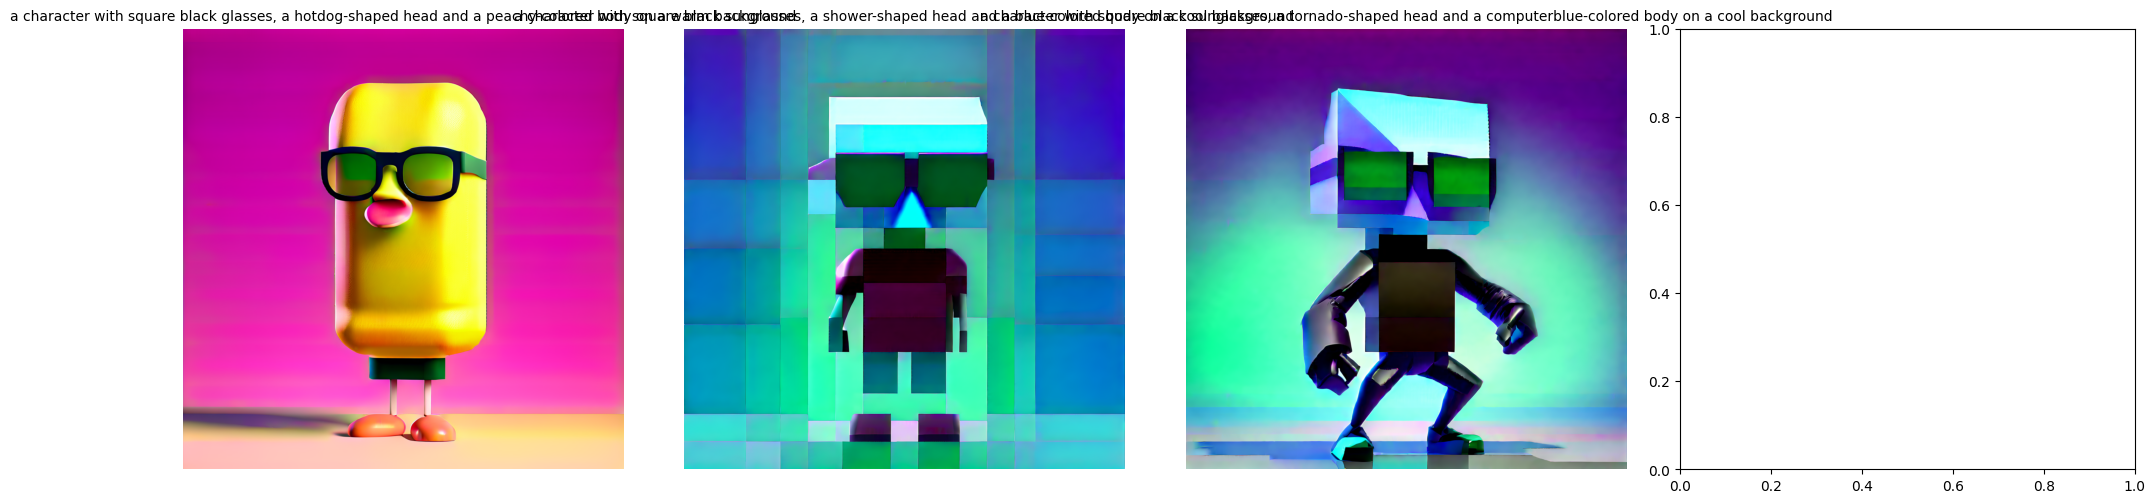

Images saved to: /kaggle/working/output/validation_results.png


In [1]:
import torch
from diffusers import DiffusionPipeline
import matplotlib.pyplot as plt
import os

# Load the base model
pipe = DiffusionPipeline.from_pretrained(
    "segmind/SSD-1B",
    torch_dtype=torch.float16,
    variant="fp16"
)
pipe.to("cuda")

# Load your trained LoRA weights
# pipe.load_lora_weights("/kaggle/input/datasets/fahimishtiak/ssd1b-lora-adapter/court_of_owls_lora_v2/pytorch_lora_weights.safetensors")

pipe.load_lora_weights("/kaggle/input/datasets/fahimishtiak/ssd1b-lora-adapter/court_of_owls_lora_v2/pytorch_lora_weights.safetensors")


# Generate test images
# prompts = [
# "a character with square black glasses, a hotdog-shaped head and a peachy-colored body on a warm background"
# ]
prompts = [
    "a character with square black glasses, a hotdog-shaped head and a peachy-colored body on a warm background",
    "a character with square black sunglasses, a shower-shaped head and a blue-colored body on a cool background",
    "a character with square black sunglasses, a tornado-shaped head and a computerblue-colored body on a cool background",
]

images = []
for prompt in prompts:
    image = pipe(
        prompt=prompt,
        num_inference_steps=25,
        guidance_scale=7.5,
        generator=torch.Generator("cuda").manual_seed(42)
    ).images[0]
    images.append(image)

# Display results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, img, prompt in zip(axes, images, prompts):
    ax.imshow(img)
    ax.set_title(prompt, fontsize=10)
    ax.axis('off')
plt.tight_layout()

# Create output directory and save
os.makedirs("/kaggle/working/output", exist_ok=True)
plt.savefig("/kaggle/working/output/validation_results.png")
plt.show()

print("Images saved to: /kaggle/working/output/validation_results.png")